<a href="https://colab.research.google.com/github/lpp5139/ist526/blob/main/time_series_moedling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing required libraries

In [8]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

#Simulating AR(1) Process

$X_t = factor \times X_{t-1} + w_t$ \\

#Rational for factor

Based on the ACAF graph from assignment, $X_{t-1}$ for 1 is set approximately half of 0. Similar is the case for $X=1$ and $X=2$. So the factor is close to 0.5   


In [9]:
from numpy.random import default_rng
rng = default_rng(12345)

#df_subset = df_subset.fillna(df_subset.mean())
n_points = 200
ar_factor = 0.5
w_std = 1.0

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2022-04-10', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

Date         X
2022-04-10 2022-04-10  0.000000
2022-04-11 2022-04-11 -1.423825
2022-04-12 2022-04-12  0.551816
2022-04-13 2022-04-13 -0.594754
2022-04-14 2022-04-14 -0.556550
...               ...       ...
2022-10-22 2022-10-22  0.035000
2022-10-23 2022-10-23  0.703682
2022-10-24 2022-10-24  1.566846
2022-10-25 2022-10-25  0.999482
2022-10-26 2022-10-26 -0.465082

[200 rows x 2 columns]

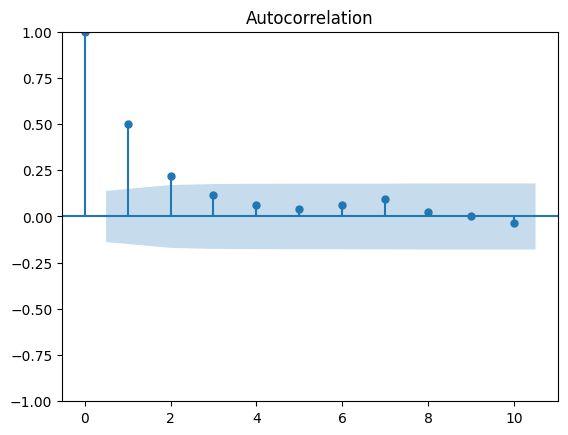

[ 1.          0.50296539  0.22091127  0.11686122  0.06040308  0.0382703
  0.06281649  0.09207996  0.02628865  0.00176565 -0.03775726]


In [10]:
from statsmodels.graphics import tsaplots # time series plots
from statsmodels.tsa.stattools import  acf
nlag = 10
result = acf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_acf(df_simulated['X'], lags = nlag)
plt.show()
print(result)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



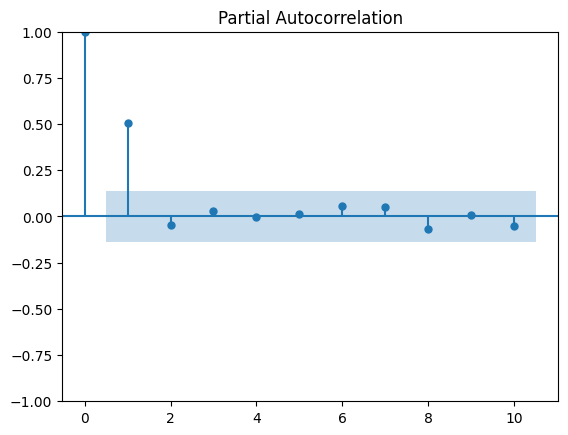

[ 1.          0.50549285 -0.04349406  0.03085008 -0.00452864  0.01164205
  0.05414861  0.0525279  -0.06836765  0.00549386 -0.05423122]


In [11]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_pacf(df_simulated['X'], lags = nlag)
plt.show()
print(result)